In [1]:
import hist as hist2
import glob
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import mplhep as hep

In [2]:
# output directory with full set of jobs
year = "2017"
odir = f"../Jan20_{year}/"

# only saved labels for Higgs or Top (not QCD..)
# more info here: https://github.com/rkansal47/HHbbVV/blob/main/src/HHbbVV/processors/TaggerInputSkimmer.py#L60-L113
labels = {
    "label_H_WqqWqq_0c": "( (fj_H_VV_4q==1) & (fj_nprongs==4) & (fj_ncquarks==0) )",
    "label_H_WqqWqq_1c": "( (fj_H_VV_4q==1) & (fj_nprongs==4) & (fj_ncquarks==1) )",
    "label_H_WqqWqq_2c": "( (fj_H_VV_4q==1) & (fj_nprongs==4) & (fj_ncquarks==2) )",
    "label_H_WqqWq_0c": "( (fj_H_VV_4q==1) & (fj_nprongs==3) & (fj_ncquarks==0) )",
    "label_H_WqqWq_1c": "( (fj_H_VV_4q==1) & (fj_nprongs==3) & (fj_ncquarks==1) )",
    "label_H_WqqWq_2c": "( (fj_H_VV_4q==1) & (fj_nprongs==3) & (fj_ncquarks==2) )",
    "label_H_WqWev": "(fj_H_VV_elenuqq==1) & (fj_nprongs!=2)",
    "label_H_WqWmv": "(fj_H_VV_munuqq==1) & (fj_nprongs!=2)",
    "label_H_WqqWtv": "(fj_H_VV_leptauelvqq==1) | (fj_H_VV_hadtauvqq==1) | (fj_H_VV_leptauelvqq==1)",
    "label_H_WqqWev_0c": "( (fj_H_VV_elenuqq==1) & (fj_nprongs==2) & (fj_ncquarks==0) )",
    "label_H_WqqWev_1c": "( (fj_H_VV_elenuqq==1) & (fj_nprongs==2) & (fj_ncquarks==1) )",
    "label_H_WqqWmv_0c": "( (fj_H_VV_munuqq==1) & (fj_nprongs==2) & (fj_ncquarks==0) )",
    "label_H_WqqWmv_1c": "( (fj_H_VV_munuqq==1) & (fj_nprongs==2) & (fj_ncquarks==1) )",
    "label_H_WqqWtauev_0c": "( (fj_H_VV_leptauelvqq==1) & (fj_nprongs==2) & (fj_ncquarks==0) )",
    "label_H_WqqWtauev_1c": "( (fj_H_VV_leptauelvqq==1) & (fj_nprongs==2) & (fj_ncquarks==1) )",
    "label_H_WqqWtaumv_0c": "( (fj_H_VV_leptaumuvqq==1) & (fj_nprongs==2) & (fj_ncquarks==0) )",
    "label_H_WqqWtaumv_1c": "( (fj_H_VV_leptaumuvqq==1) & (fj_nprongs==2) & (fj_ncquarks==1) )",
    "label_H_WqqWtauhv_0c": "( (fj_H_VV_hadtauvqq==1) & (fj_nprongs==2) & (fj_ncquarks==0) )",
    "label_H_WqqWtauhv_1c": "( (fj_H_VV_hadtauvqq==1) & (fj_nprongs==2) & (fj_ncquarks==1) )",
    "label_Top_nob": "(fj_Top_bmerged==0)",
    "label_Top_bWqq_0c": "( (fj_Top_2q==1) & (fj_nprongs == 2)  & (fj_Top_bmerged==1) & (fj_ncquarks==0) )",
    "label_Top_bWqq_1c": "( (fj_Top_2q==1) & (fj_nprongs == 2) & (fj_Top_bmerged==1) & (fj_ncquarks==1) )",
    "label_Top_bWq_0c": "( (fj_Top_2q==1) & (fj_nprongs == 1) & (fj_Top_bmerged==1) & (fj_ncquarks==0) )",
    "label_Top_bWq_1c": "( (fj_Top_2q==1) & (fj_nprongs == 1) & (fj_Top_bmerged==1) & (fj_ncquarks==1) )",
    "label_Top_bWev": "( (fj_Top_elenu==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWmv": "( (fj_Top_munu==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWtauhv": "( (fj_Top_hadtauvqq==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWtauev": "( (fj_Top_leptauelvnu==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWtaumv": "( (fj_Top_leptaumuvnu==1) & (fj_Top_bmerged==1) )",
}

samples_to_plot = {
    "TTbar": [
        "TTToSemiLeptonic",
        "TTToHadronic",
        "TTTo2L2Nu"
    ],
    "QCD": [
        "QCD_Pt_170to300",
        "QCD_Pt_300to470",
        "QCD_Pt_470to600",
        "QCD_Pt_600to800",
        "QCD_Pt_800to1000",
        "QCD_Pt_1000to1400",
        "QCD_Pt_1400to1800",
        "QCD_Pt_1800to2400",
        "QCD_Pt_2400to3200",
        "QCD_Pt_3200toInf",
    ],
    # use only ggH for this check
    "HWW": [
        "GluGluHToWW_Pt-200ToInf_M-125"
    ],
    "WJetsLNu": [
        "WJetsToLNu_HT-100To200",
        "WJetsToLNu_HT-200To400",
        "WJetsToLNu_HT-400To600",
        "WJetsToLNu_HT-70To100",
        "WJetsToQQ_HT-200to400",
        "WJetsToQQ_HT-600to800",
        "WJetsToLNu_HT-1200To2500",
        "WJetsToLNu_HT-2500ToInf",
        "WJetsToLNu_HT-600To800",
        "WJetsToLNu_HT-800To1200",
        "WJetsToQQ_HT-400to600,
        "WJetsToQQ_HT-800toInf",
    ],
}

# Make histograms for labels

In [7]:
# labels to check per sample
labels_per_sample = {
    "TTbar": [
        "label_Top_bWqq_0c","label_Top_bWqq_1c",
        "label_Top_bWq_0c","label_Top_bWq_1c",
        "label_Top_bWev","label_Top_bWmv",
        "label_Top_bWtauhv","label_Top_bWtauev","label_Top_bWtaumv",
        "label_Top_nob",
    ],
    "HWW": [
        # "label_H_WqqWqq_0c","label_H_WqqWqq_1c","label_H_WqqWqq_2c",
        # "label_H_WqqWq_0c","label_H_WqqWq_1c","label_H_WqqWq_2c",
        "label_H_WqWev", "label_H_WqWmv",
        #"label_H_WqqWev_0lep",
        #"label_H_WqqWtv",
        #"label_H_WqqWtaumv_0c","label_H_WqqWtaumv_1c",
        #"label_H_WqqWtauev_0c","label_H_WqqWtauev_1c",
        "label_H_WqqWev_0c","label_H_WqqWev_1c",
        "label_H_WqqWmv_0c","label_H_WqqWmv_1c",
    ]
}

match_labels = {
    "HWW": "fj_H_VV_isMatched",
    "TTbar": "fj_Top_isMatched",
}

import matplotlib.colors as mcolors
color_by_label = {}
for i,label in enumerate(labels):
    color_by_label[label] = list(mcolors.TABLEAU_COLORS.values())[i%10]

def get_label_histograms(ch,samples_to_check=["HWW","TTbar"]):
    
    # histograms from 0 to 2 of each label
    label_hists = {}
    for label in labels.keys():
        label_hists[label] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(2, 0, 2, name="label", label=label)   
        )
        
    # histogram of is_matched* variables
    match_hist = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(2, 0, 2, name="is_matched", label=label)   
    )
    
    # histogram of all possible labels for a sample
    single_hist = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.StrCategory([], name="labels", growth=True),  
    )
    
    
    for sample in samples_to_check:
        
        # get list of parquet files
        for s in samples_to_plot[sample]:
            parquet_files = glob.glob(f"{odir}/{s}/outfiles/*_{ch}.parquet")
            
            for parquet_file in parquet_files:
                try:
                    data = pd.read_parquet(parquet_file)
                except:
                    continue
                
                # define PKU labels using UCSD labels
                for lab,lab_def in labels.items():
                    # lab_def is a label definition as defined in the dicitonary above
                    
                    if lab not in labels_per_sample[sample]: continue
                    match_label = match_labels[sample]
                    # print(lab_def)
                    data[lab] = data.query(lab_def)[match_label]
                
                # fill nans (rows that didn't pass w false)
                data.fillna(value=False,inplace=True)
                
                df = pd.DataFrame()
                for i,label in enumerate(labels_per_sample[sample]):
                    # print(data[label])
                    # print(label_hists[label])
                    # print(sample)
                    label_hists[label].fill(
                        samples=sample,
                        label=data[label].astype(int)
                    )
                    
                    df[label] = data[label]
                    
                df["unmatched"] = ~df[df.columns].any(axis='columns')
                x = np.where(df["unmatched"],"unmatched","matched")
                
                # try to debug where the unmatched signal events are coming from
                #print(np.array(data.columns))
                #for c in ['fj_genH_pt','fj_genV_dR','fj_genVstar',
                #          'genV_genVstar_dR','fj_nprongs','fj_ncquarks',
                #          'fj_lepinprongs','fj_H_VV_4q','fj_H_VV_elenuqq','fj_H_VV_munuqq',
                #          'fj_H_VV_leptauelvqq','fj_H_VV_leptaumuvqq','fj_H_VV_hadtauvqq',
                #          'fj_H_VV_isVlepton','fj_H_VV_isVstarlepton','fj_H_VV_isMatched']:
                #    print(data.loc[df["unmatched"],c])
     
                single_hist.fill(
                    samples=sample,
                    labels=x,
                )
                    
                match_hist.fill(
                    samples=sample,
                    is_matched = data[match_label]
                )
    return label_hists,match_hist,single_hist

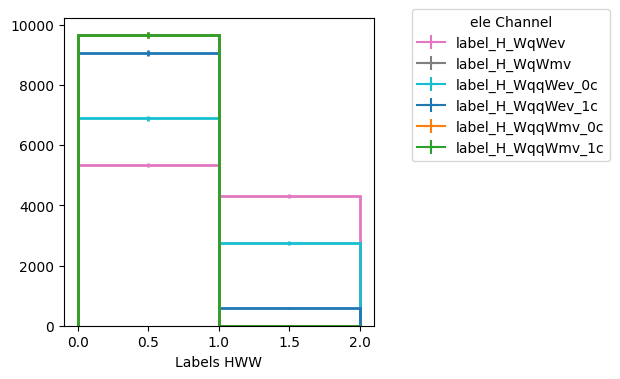

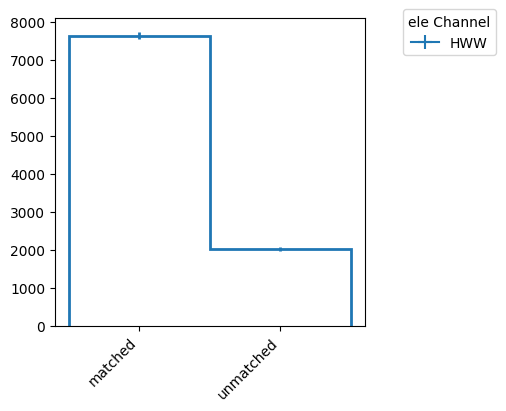

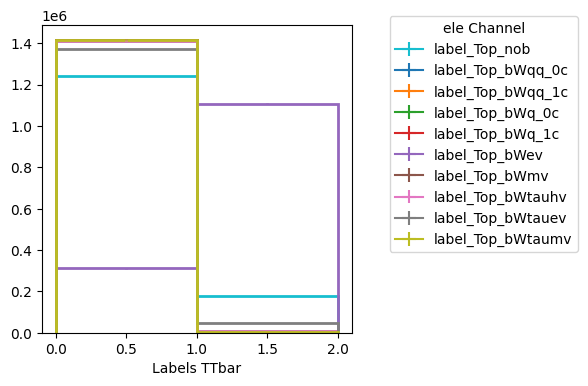

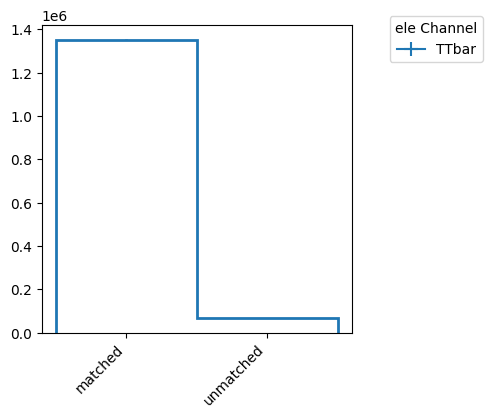

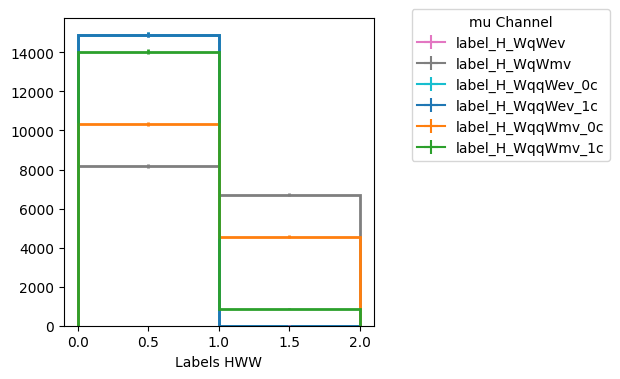

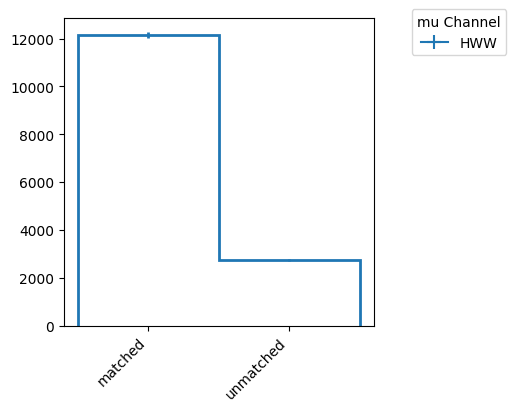

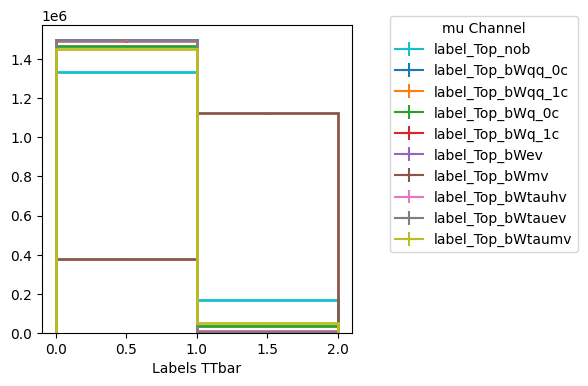

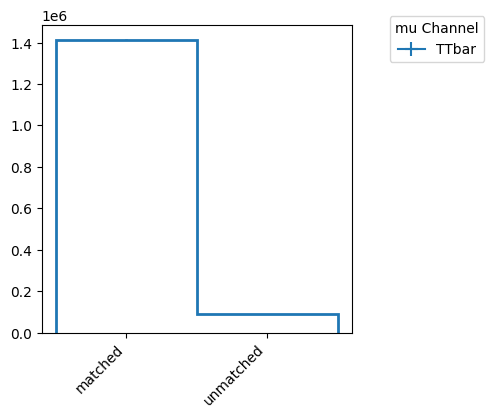

In [8]:
ss = ["HWW","TTbar"]
for ch in ["ele","mu"]:
    label_hists,match_hist,single_hist = get_label_histograms(ch,ss)

    for sample in ss:
        fig, ax = plt.subplots(figsize=(4, 4))
        for label,h in label_hists.items():
            if label not in labels_per_sample[sample]: continue
            hep.histplot(
                    h[{"samples": sample}],
                    label=label,
                    ax=ax,
                    linewidth=2,
                    color=color_by_label[label],
                )
        ax.set_xlabel(f"Labels {sample}")
        ax.legend(title=f"{ch} Channel",bbox_to_anchor=(1.1, 1.05))
        
        # match hist
        """
        fig, ax = plt.subplots(figsize=(4, 4))
        hep.histplot(
            match_hist[{"samples": sample}],
            label=f"is_matched_{sample}",
            ax=ax,
            linewidth=2
        )
        ax.set_xlabel(f"Matched {sample}")
        ax.legend(title=f"{ch} Channel") 

        """
        fig, ax = plt.subplots(figsize=(4, 4))
        hep.histplot(
            single_hist[{"samples": sample}],
            label=f"{sample}",
            ax=ax,
            linewidth=2
        )
        ax.set_xlabel("")
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.legend(title=f"{ch} Channel",bbox_to_anchor=(1.1, 1.05)) 


# Make histograms for tagger probabilities

In [20]:
# do something similar but now plot the tagger probabilities for each sample (HWW, TTbar, WJetsLNu and QCD)


# use any one parquet file to get the labels/scores as a list
test_parquet = pd.read_parquet(f"{odir}/GluGluHToWW_Pt-200ToInf_M-125/outfiles/0-20_ele.parquet", engine='pyarrow')

probs = []
for key in test_parquet.keys():
    if "label" and "ParT" in key:
        probs.append(key)
        print(key)

fj_ParT_label_H_WqqWqq_0c
fj_ParT_label_H_WqqWqq_1c
fj_ParT_label_H_WqqWqq_2c
fj_ParT_label_H_WqqWq_0c
fj_ParT_label_H_WqqWq_1c
fj_ParT_label_H_WqqWq_2c
fj_ParT_label_H_WqqWev_0c
fj_ParT_label_H_WqqWev_1c
fj_ParT_label_H_WqqWmv_0c
fj_ParT_label_H_WqqWmv_1c
fj_ParT_label_H_WqqWtauev_0c
fj_ParT_label_H_WqqWtauev_1c
fj_ParT_label_H_WqqWtaumv_0c
fj_ParT_label_H_WqqWtaumv_1c
fj_ParT_label_H_WqqWtauhv_0c
fj_ParT_label_H_WqqWtauhv_1c
fj_ParT_label_H_bb
fj_ParT_label_H_cc
fj_ParT_label_H_ss
fj_ParT_label_H_qq
fj_ParT_label_H_tauhtaue
fj_ParT_label_H_tauhtaum
fj_ParT_label_H_tauhtauh
fj_ParT_label_QCD_bb
fj_ParT_label_QCD_cc
fj_ParT_label_QCD_b
fj_ParT_label_QCD_c
fj_ParT_label_QCD_others
fj_ParT_label_Top_bWqq_0c
fj_ParT_label_Top_bWqq_1c
fj_ParT_label_Top_bWq_0c
fj_ParT_label_Top_bWq_1c
fj_ParT_label_Top_bWev
fj_ParT_label_Top_bWmv
fj_ParT_label_Top_bWtauhv
fj_ParT_label_Top_bWtauev
fj_ParT_label_Top_bWtaumv
fj_ParT_probQCD
fj_ParT_probTopb
fj_ParT_probHWWelenuqq
fj_ParT_probHWWmunuqq
